# Usage

Download your iteration csv files under ./data/iterations. Edit the conditions on dfS and execute.

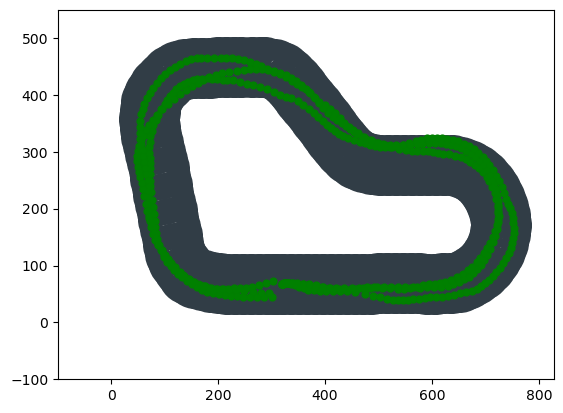

In [21]:
import os
import numpy as np
import pandas as pd
from math import exp
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TRACK_DATA = './data/reinvent2018track.csv'
ITERATION_DATA_FOLDER = r"./data/iterations"


def getPathXY():
    path = pd.read_csv(TRACK_DATA, header=None)
    pathList = path.values.tolist()
    X, Y = [item[0] * 100 for item in pathList], [item[1] * 100 for item in pathList]
    return X, Y


def getPDInfo(excelname, sheetname):
    dataAll = pd.read_excel(excelname, sheet_name=sheetname)
    timeSet = set(dataAll.episode.tolist())
    return dataAll, timeSet


def getTimesXYSBySheetName(dataAll, timeIndex):
    data = dataAll[dataAll.episode == timeIndex]
    x, y, tstamp, colorListSelectSpeed, colorListSelectReward, speedL, rewardList = [x * 100 for x in
                                                                                     data.X.values.tolist()], [y * 100
                                                                                                               for y in
                                                                                                               data.Y.values.tolist()], [
        t * 0.3 for t in data.tstamp.values.tolist()], [t for t in data.color.values.tolist()][1:], [t for t in
                                                                                                     data.Rcolor.values.tolist()][
                                                                                                    1:], [t for t in
                                                                                                          data.throttle.values.tolist()][
                                                                                                         1:], [t for t
                                                                                                               in
                                                                                                               data.reward.values.tolist()][
                                                                                                              1:]
    tstampDelta = [tstamp[i + 1] - tstamp[i] for i in range(len(tstamp) - 1)]
    return x, y, tstampDelta, colorListSelectSpeed, colorListSelectReward, speedL, rewardList


def DrawTrack(fig, ex, ey, tstamp, colorListSelectSpeed, colorListSelectReward, speedL,
              rewardList):  # 39  0.387   63.43
    ims = []
    for i in range(len(ex) - 1):
        plt.title('speed:' + str(round(speedL[i], 2)) + '\nreward:' + str(round(rewardList[i], 3)))
        plt.xlabel('Env: re:Invent 2018\nunite:cm')
        im = plt.plot(ex[0:i + 1], ey[0:i + 1], color=colorListSelectSpeed[i], linewidth=4)
        ims.append(im)
        # plt.plot(xs, ys,color=color,linewidth=12.365) # 车宽算出来12.365cm
        plt.pause(tstamp[i])
    # ani = animation.ArtistAnimation(fig, ims, repeat_delay=1000)
    # ani.save("1.gif", writer='pillow')
    return ims


def speed2Color(speed, speedList, colorList):
    for index, p in enumerate(speedList):
        if speed <= p:
            return colorList[index]
    else:
        return colorList[0]


def reward2Color(reward, rewardList, colorList):
    if reward > 2:
        return 'red'
    elif reward >= 1:
        return 'orangered'
    else:
        return 'green'


if __name__ == '__main__':
    X, Y = getPathXY()
    plt.axis([-100, max(X) + 100, -100, max(Y) + 100])
    # plt.ion()
    plt.scatter(X, Y, color='#313D46', linewidth=38)
    fileList = [x for x in os.listdir(ITERATION_DATA_FOLDER) if x.lower().endswith('.csv') and x.startswith('0')]
    if len(fileList) == 1:
        df = pd.read_csv(os.path.join(ITERATION_DATA_FOLDER, fileList[0]))
        df.episode, df.steps, df.closest_waypoint = df.episode.map(int), df.steps.map(float).map(
            int), df.closest_waypoint.map(int)
        df.X, df.Y, df.throttle, df.reward, df.progress, df.track_len, df.tstamp = df.X.map(float), df.Y.map(
            float), df.throttle.map(float), df.reward.map(float), df.progress.map(float), df.track_len.map(
            float), df.tstamp.map(float)
        dfS = df.copy(deep=True)
        # dfS = df[df.episode.isin([0])].copy(deep=True)
        ### 1. speed select
        # speedThrottle = 3.0
        # Lx,Ly = [100*x for x in dfS[dfS.throttle < speedThrottle].X.tolist()],[100*y for y in dfS[dfS.throttle < speedThrottle].Y.tolist()]
        # plt.scatter(Lx, Ly,marker = 'o', color = 'green', s = 24)
        ### 2. progress
        progressRange = (0, 100)
        Lx, Ly = [100 * x for x in
                  dfS[(dfS.progress > progressRange[0]) & (dfS.progress < progressRange[1])].X.tolist()], [100 * y for y
                                                                                                           in dfS[(
                                                                                                                              dfS.progress >
                                                                                                                              progressRange[
                                                                                                                                  0]) & (
                                                                                                                              dfS.progress <
                                                                                                                              progressRange[
                                                                                                                                  1])].Y.tolist()]
        plt.scatter(Lx, Ly, marker='o', color='green', s=24)
        plt.show()
    else:
        print('CSV file not unique!')


    
